# importing libraries

Import necessary libraries

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection  import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import export_graphviz
from io import StringIO
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix  
from IPython.display import Image
from sklearn.decomposition import PCA
import pydotplus
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from scipy import interp

import the data set to use for the model

In [2]:
df = pd.read_csv('./creditcardcsvpresent.csv')
yes_no_mapping = {'Y':1, 'N':0}
df['Is declined'] = df['Is declined'].map(yes_no_mapping)
df['isForeignTransaction'] = df['isForeignTransaction'].map(yes_no_mapping)
df['isHighRiskCountry'] = df['isHighRiskCountry'].map(yes_no_mapping)
df['isFradulent'] = df['isFradulent'].map(yes_no_mapping)
feature_list=df.columns[2:]
feature_list

Index(['Average Amount/transaction/day', 'Transaction_amount', 'Is declined',
       'Total Number of declines/day', 'isForeignTransaction',
       'isHighRiskCountry', 'Daily_chargeback_avg_amt', '6_month_avg_chbk_amt',
       '6-month_chbk_freq', 'isFradulent'],
      dtype='object')

In [3]:
df.shape

(3075, 12)

In [4]:
df.isnull().values.any()

True

In [5]:
df.drop('Merchant_id',axis=1, inplace=True)
df.drop('Transaction date',axis=1, inplace=True)

In [26]:
df.head(-50)

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,100.000000,3000.000000,0,5,1,1,0,0.0,0,1
1,100.000000,4300.000000,0,5,1,1,0,0.0,0,1
2,185.500000,4823.000000,1,5,0,0,0,0.0,0,1
3,185.500000,5008.500000,1,8,0,0,0,0.0,0,1
4,500.000000,26000.000000,0,0,1,1,800,677.2,6,1
...,...,...,...,...,...,...,...,...,...,...
3020,579.520023,17385.600680,0,0,0,0,0,0.0,0,0
3021,624.329401,3745.976408,0,0,0,0,0,0.0,0,0
3022,185.176778,3888.712344,0,0,0,0,0,0.0,0,0
3023,629.331952,16991.962710,0,0,0,0,0,0.0,0,0


In [7]:
df.describe()

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
count,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,515.026556,9876.399210,0.018537,0.957398,0.229593,0.066667,55.737561,40.022407,0.391870,0.145691
std,291.906978,10135.331016,0.134903,2.192391,0.420640,0.249484,206.634779,155.968840,1.548479,0.352854
min,4.011527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,269.788047,2408.781147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,502.549575,6698.891856,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,765.272803,14422.568935,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2000.000000,108000.000000,1.000000,20.000000,1.000000,1.000000,998.000000,998.000000,9.000000,1.000000


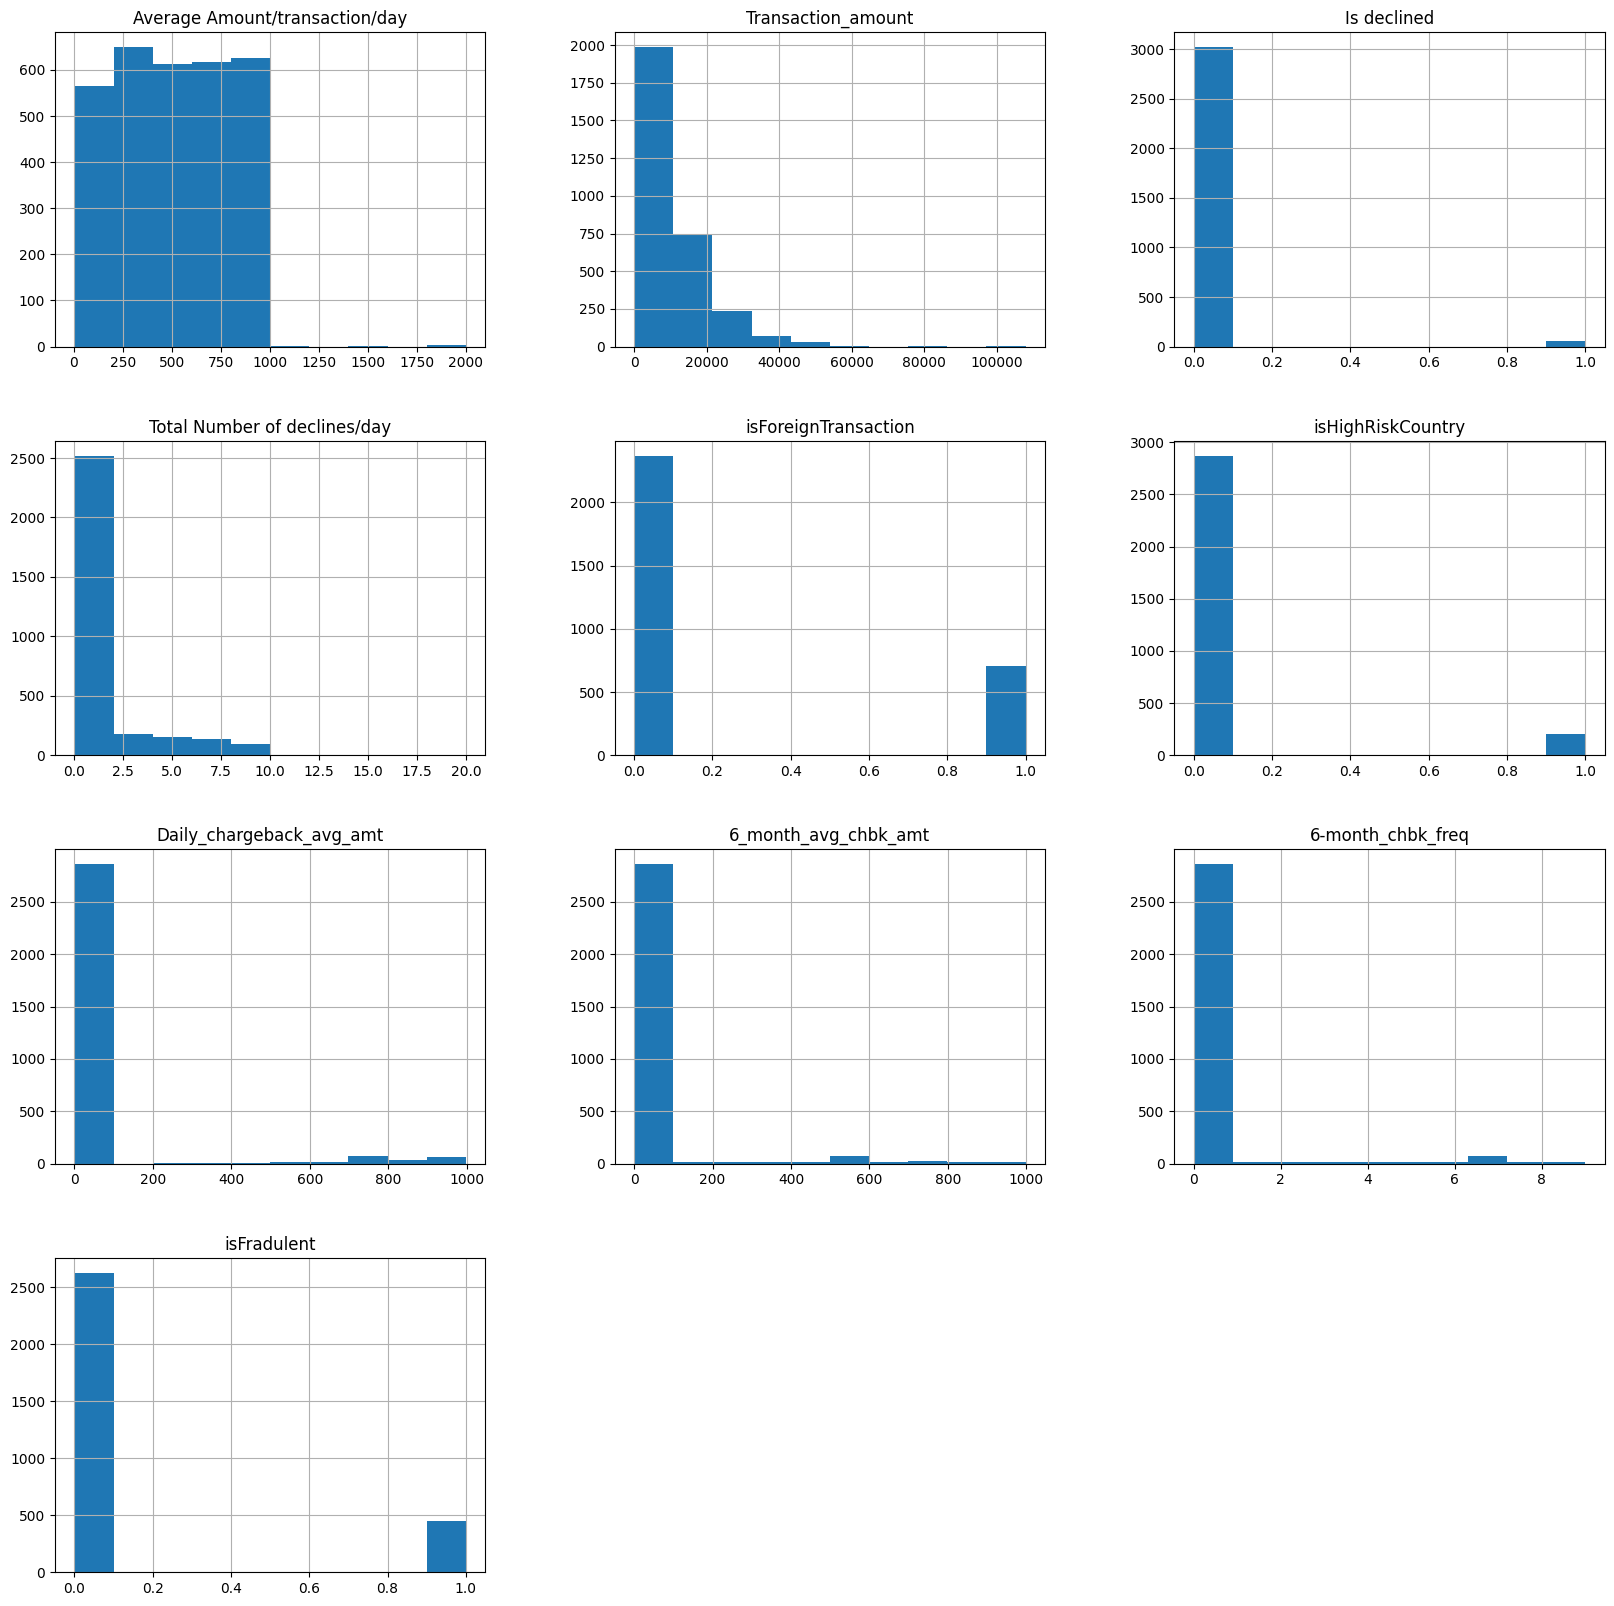

In [8]:
df.hist(figsize=(20,20))
plt.show()

In [9]:
# Extracting features (X) and target variable (y) from the dataframe
y =  df.values[:,-1]
X =  df.values[:,:-1]
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
# Creating a Decision Tree classifier
tree = DecisionTreeClassifier(criterion='gini', min_samples_leaf= 5, min_impurity_decrease = 0, max_depth=7)
# Training (fitting) the Decision Tree model on the training data
tree.fit(X_train, y_train)
# Predictions on the training set
y_train_pred = tree.predict(X_train)
# Predictions on the test set
y_test_pred = tree.predict(X_test)
print('Accuracy on train data: {}%'.format(accuracy_score(y_train, y_train_pred) * 100))
print('Accuracy on test data: {}%'.format(accuracy_score(y_test, y_test_pred) * 100))

Accuracy on train data: 98.65241635687732%
Accuracy on test data: 97.72481040086673%


These accuracy scores suggest that the Decision Tree model is performing well on both the training and test datasets.

In [10]:
print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test:',y_test.shape)

x_train shape: (2152, 9)
x_test shape: (923, 9)
y_train shape: (2152,)
y_test: (923,)


The dataset is split into a training set with 2152 samples and a testing set with 923 samples. Both sets have 9 features. The target sets (y_train and y_test) have corresponding labels or values for each sample in the training and testing feature sets.

In [11]:
# Get numerical feature importances
importances = list(tree.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[0], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: isHighRiskCountry    Importance: 0.461
Variable: isForeignTransaction Importance: 0.007
Variable: Transaction_amount   Importance: 0.072
Variable: Total Number of declines/day Importance: 0.209
Variable: Is declined          Importance: 0.0
Variable: Daily_chargeback_avg_amt Importance: 0.0
Variable: Average Amount/transaction/day Importance: 0.039
Variable: 6_month_avg_chbk_amt Importance: 0.008
Variable: 6-month_chbk_freq    Importance: 0.204


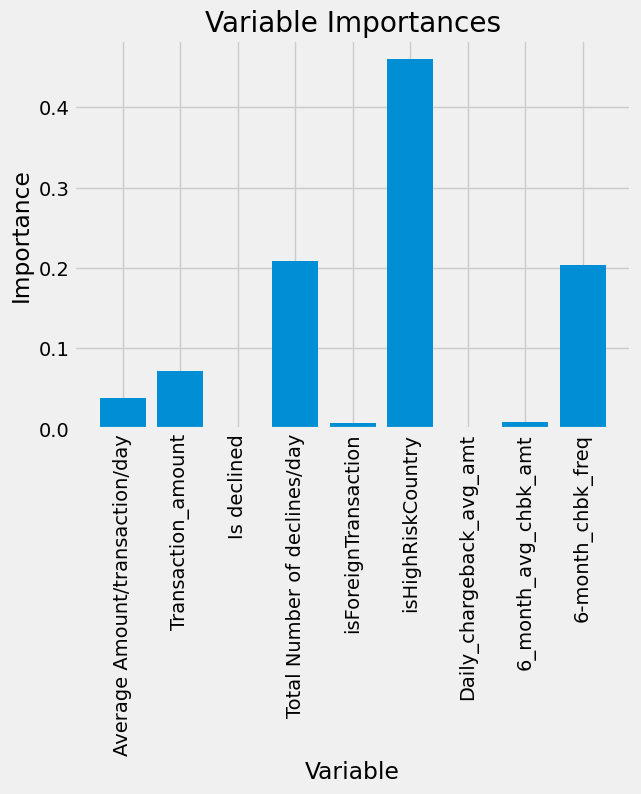

In [12]:
# Import matplotlib for plotting and use the magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# List of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation='vertical')

# Tick labels for x-axis
plt.xticks(x_values, feature_list[0:9], rotation="vertical")

# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')

# Show the plot
plt.show()


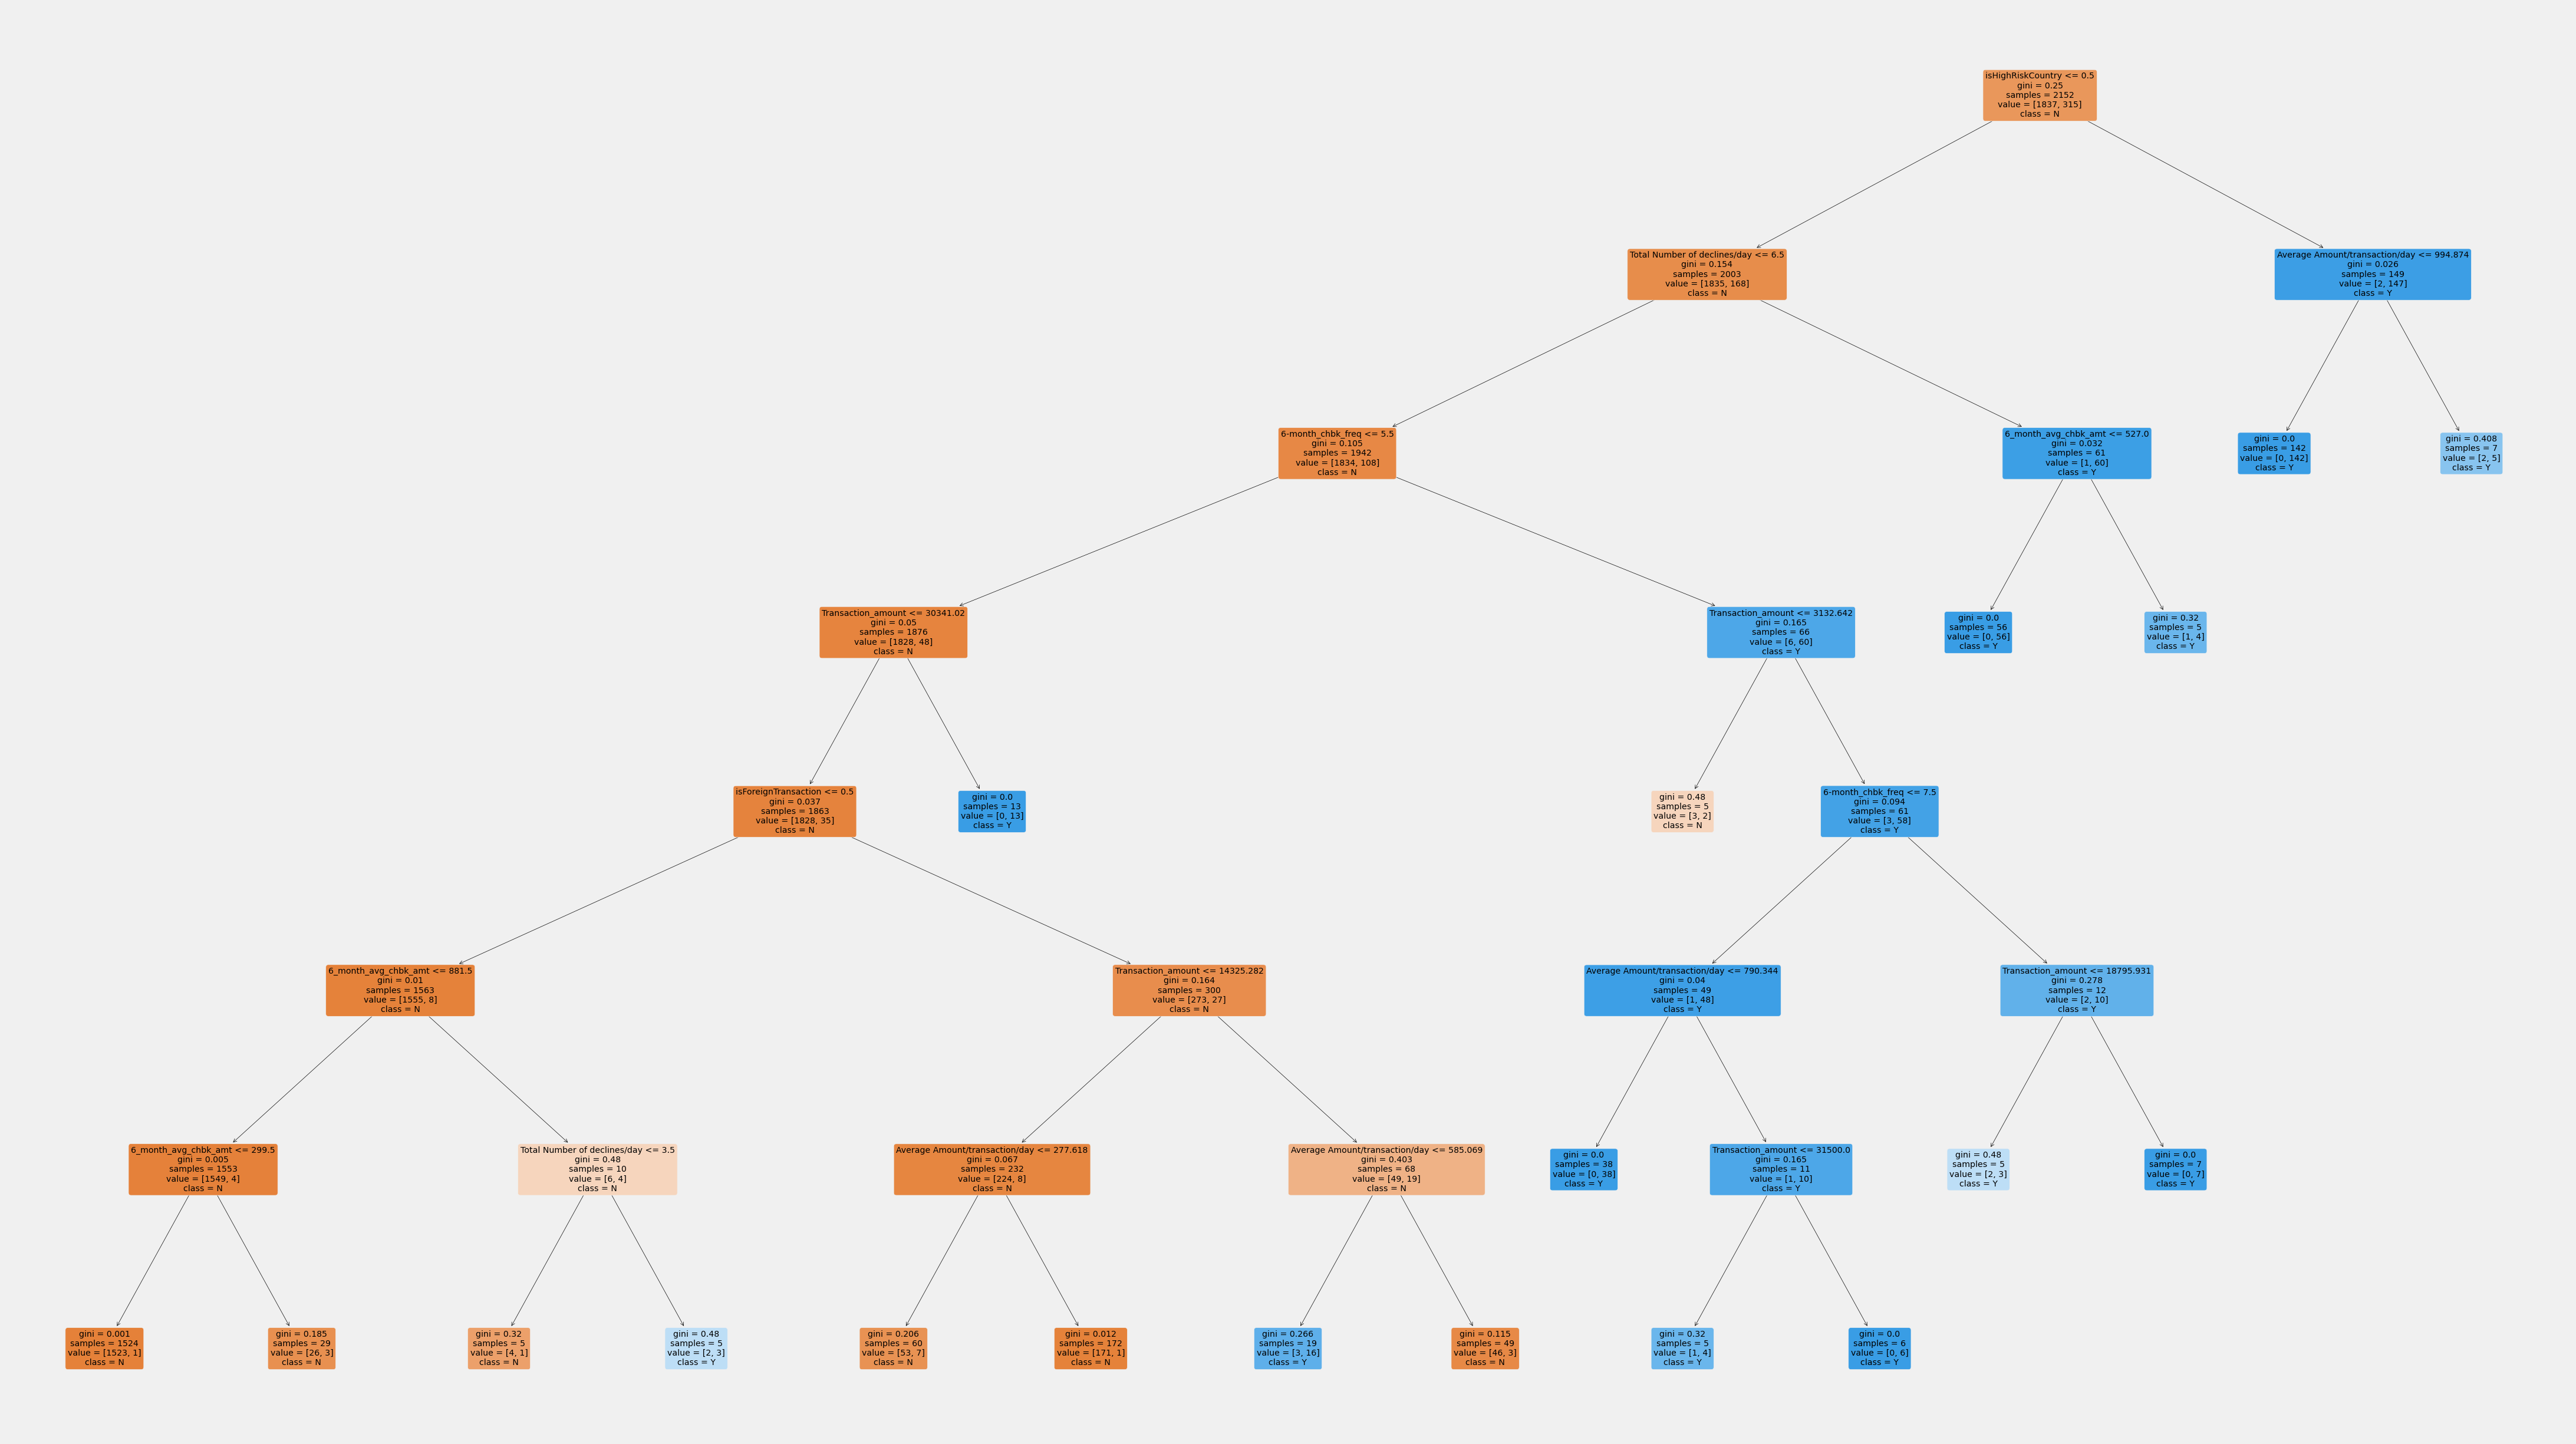

In [13]:

# Plotting the decision tree

# Create a figure and axes
plt.figure(figsize=(50,30))

# Plot the decision tree
plot_tree(tree, feature_names=df.columns[:-1], class_names=['N', 'Y'], filled=True, rounded=True, impurity=True)

# Display the plot
plt.show()


Confusion matrix, without normalization
[[785   5]
 [ 16 117]]
Normalized confusion matrix
[[0.99 0.01]
 [0.12 0.88]]


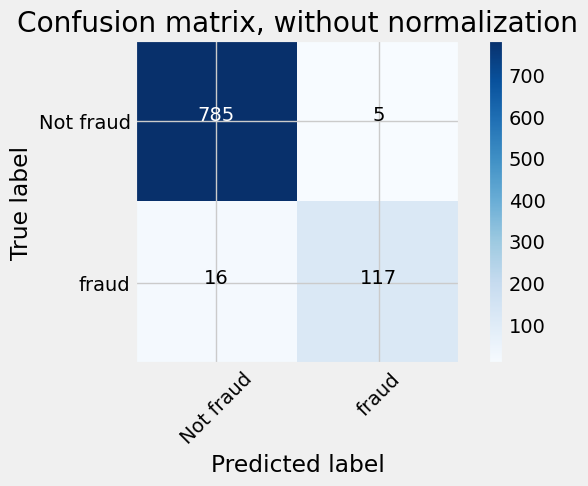

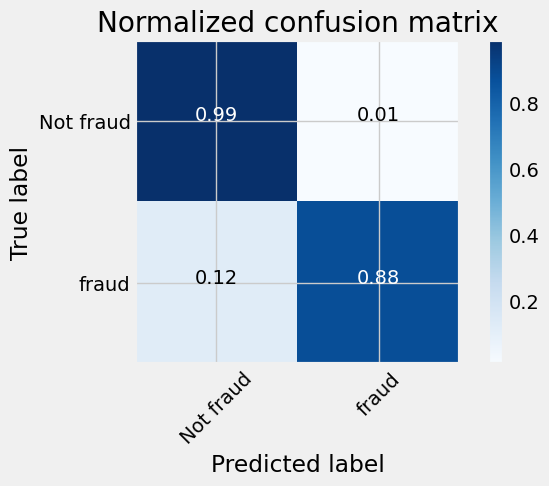

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not fraud','fraud'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not fraud','fraud'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

The confusion matrix helps to assess the performance of a classification model by breaking down the counts of true positive, true negative, false positive, and false negative predictions.

True negative(785): it represents the number of non-fraudulent transactions that were correctly identified as non-fraudulent.

False Positives (5): It represents the number of non-fraudulent transactions that were incorrectly identified as fraudulent.

False Negatives (16): It represents the number of fraudulent transactions that were incorrectly identified as non-fraudulent.

True Positives (117): It represents the number of fraudulent transactions that were correctly identified as fraudulent.

In [15]:
precision_score(y_test, y_test_pred)

0.9590163934426229

A high precision score indicates that when the model predicts a transaction as fraudulent, it is correct about 95.9% of the time.

The model is effective at avoiding false positives (instances where it incorrectly predicts a transaction as fraudulent)

In [16]:
recall_score(y_test, y_test_pred)

0.8796992481203008

The model achieved a recall of approximately 88.0% on the test data. In this fraud detection model, recall represents the ability of the model to correctly identify all actual fraudulent transactions among all transactions that are truly fraudulent. A high recall score indicates that the model is effective at capturing a significant portion of actual fraud cases.

In [17]:
f1_score(y_test, y_test_pred)

0.9176470588235294

The F1 score is a measure of a model's accuracy on a dataset. It combines both precision and recall into a single metric. A high F1 score indicates both good precision and recall, and in this case, it suggests that the model is achieving a good balance between correctly identifying fraud cases and avoiding false positives.

In [18]:
precision_recall_fscore_support(y_test, y_test_pred)

(array([0.98, 0.96]),
 array([0.99, 0.88]),
 array([0.99, 0.92]),
 array([790, 133]))

In [19]:
precision_recall_fscore_support(y_test, y_test_pred)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred)) 

[[785   5]
 [ 16 117]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       790
         1.0       0.96      0.88      0.92       133

    accuracy                           0.98       923
   macro avg       0.97      0.94      0.95       923
weighted avg       0.98      0.98      0.98       923



In [20]:
average_precision = average_precision_score(y_test, y_test_pred)

print('Average precision-recall score(AP): {0:0.2f}'.format(
      average_precision))

Average precision-recall score(AP): 0.86


The average precision score ranges from 0 to 1, where 1 represents perfect precision and 0 represents the lowest precision.
An AP score of 0.86 is very good, suggesting that the model performs well in terms of precision-recall trade-off.

Text(0.5, 1.0, 'Precision-Recall curve: AP=0.86')

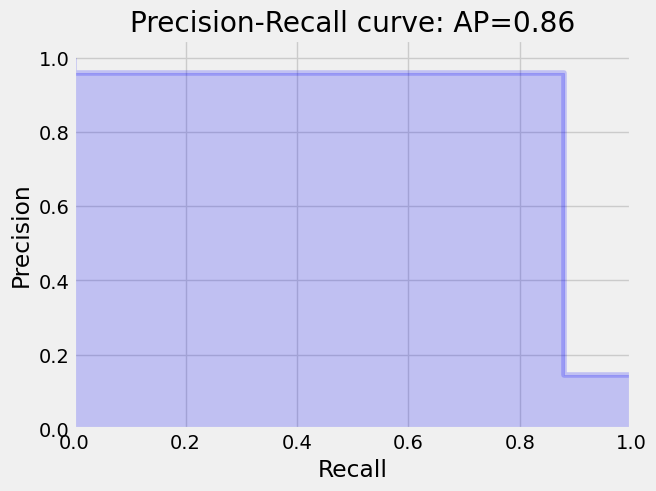

In [21]:
# calculate precision and recall values at different probability thresholds
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

The Average Precision is a measure of the area under the Precision-Recall curve, providing a summary of the model's performance across different levels of recall. An AP of 0.86 suggests good performance, with higher values indicating better model performance.

ROC-AUC-Score: 0.9929142476444275


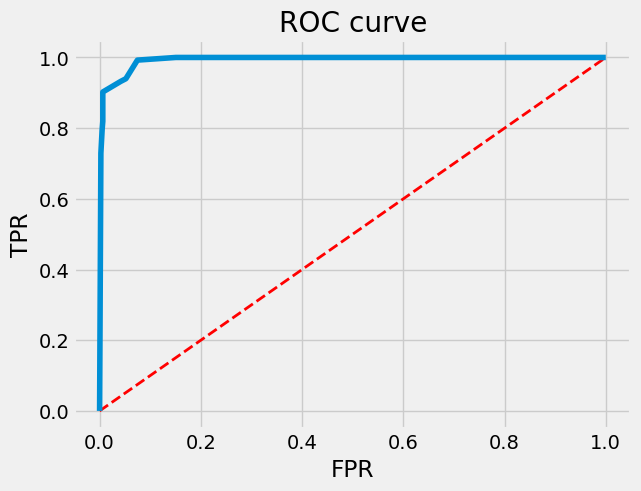

In [22]:
#Line width of the ROC curve
lw = 2
# Generates probability estimates for the positive class
predictions = tree.predict_proba(X_test)
# calculates the ROC-AUC score
print ('ROC-AUC-Score:', (roc_auc_score(y_test, predictions[:,1])))
# Calculate the False positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
# Plotting the ROC curve based on calculated FPR and TPR
plt.clf()
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

A ROC-AUC score of 0.9929 is very high, suggesting that the model has excellent discriminatory power, with a high true positive rate and a low false positive rate across different classification thresholds. It's a strong indicator of the model's ability to distinguish fradulent transactions from non fraudulent.

In [30]:
# Predict nature of transaction with set parameters
y_result = tree.predict([[804.7617661,42652.3736,0,0,0,0,953,950,8]])
if y_result == 1:
    print("Transaction is fraudulent")
else:
    print("Transaction is not fraudulent")

Transaction is fraudulent


In [32]:
y_result = tree.predict([[257.142182,3085.706182,0,1,0,0,0,123,9]])
if y_result == 1:
    print("Transaction is fraudulent")
else:
    print("Transaction is not fraudulent")

Transaction is not fraudulent
